In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key 
from datetime import datetime

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes as a list
coordinates = list(lat_lngs)

In [4]:
#create a list for holidng the ciites
cities=[]

#Identify the nearest city for each latitude and longitude comnindation
for coordiante in coordinates:
    city=citipy.nearest_city(coordiante[0], coordiante[1]).city_name
    #if the city is unique, then we'll add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confrim sufficient count.
len(cities)

636

In [5]:
#Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=06ee2347f33ef1206b53e5220e41841a


In [6]:
#create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 58.19,
  'feels_like': 56.44,
  'temp_min': 51.53,
  'temp_max': 62.1,
  'pressure': 1028,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 7, 'deg': 252, 'gust': 8.99},
 'clouds': {'all': 15},
 'dt': 1621482608,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1621415933,
  'sunset': 1621468970},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [7]:
#get the JSON data
boston_data = city_weather.json()
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 62.1 58 15 7


In [8]:
#create an empty list to hold the weather data
city_data=[]
#print the beginning of the logging 
print("Beginning Data Retreival      ")
print("------------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retreival      
------------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | vyshhorod
Processing Record 3 of Set 1 | faya
Processing Record 4 of Set 1 | la ronge
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | denham springs
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | itapuranga
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | ulaanbaatar
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | prince rupert
Processing Record 14 of Set 1 | voi
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | coihaique
Processing Record 18 of Set 1 | sistranda
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1

Processing Record 36 of Set 4 | wanning
Processing Record 37 of Set 4 | tilichiki
Processing Record 38 of Set 4 | champerico
Processing Record 39 of Set 4 | srednekolymsk
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | alto araguaia
Processing Record 42 of Set 4 | warmbad
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | vestmanna
Processing Record 45 of Set 4 | davila
Processing Record 46 of Set 4 | chiang klang
Processing Record 47 of Set 4 | swan hill
Processing Record 48 of Set 4 | skjervoy
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | narsaq
Processing Record 1 of Set 5 | springfield
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | jiamusi
Processing Record 4 of Set 5 | dasoguz
Processing Record 5 of Set 5 | sheregesh
Processing Record 6 of Set 5 | umm durman
City not found. Skipping...
Processing Record 7 of Set 5 | hambantota
Processing Record 8 of Set 

Processing Record 23 of Set 8 | kutum
Processing Record 24 of Set 8 | baie-saint-paul
Processing Record 25 of Set 8 | itoman
Processing Record 26 of Set 8 | fuling
Processing Record 27 of Set 8 | labuhan
Processing Record 28 of Set 8 | ambilobe
Processing Record 29 of Set 8 | bukama
Processing Record 30 of Set 8 | ingham
Processing Record 31 of Set 8 | oudtshoorn
Processing Record 32 of Set 8 | mikhaylovka
Processing Record 33 of Set 8 | basco
Processing Record 34 of Set 8 | myitkyina
Processing Record 35 of Set 8 | shubarkuduk
Processing Record 36 of Set 8 | myaundzha
Processing Record 37 of Set 8 | bristol
Processing Record 38 of Set 8 | abdulino
Processing Record 39 of Set 8 | bria
Processing Record 40 of Set 8 | ust-nera
Processing Record 41 of Set 8 | plopu
Processing Record 42 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 43 of Set 8 | oistins
Processing Record 44 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 45 of Set 8 | maniitsoq
Proce

Processing Record 11 of Set 12 | caravelas
Processing Record 12 of Set 12 | puerto baquerizo moreno
Processing Record 13 of Set 12 | bandarbeyla
Processing Record 14 of Set 12 | uryupinsk
Processing Record 15 of Set 12 | tarbagatay
Processing Record 16 of Set 12 | kamakwie
Processing Record 17 of Set 12 | djibo
Processing Record 18 of Set 12 | waingapu
Processing Record 19 of Set 12 | maningrida
Processing Record 20 of Set 12 | lat yao
Processing Record 21 of Set 12 | novyy urengoy
Processing Record 22 of Set 12 | buin
Processing Record 23 of Set 12 | atar
Processing Record 24 of Set 12 | suntar
Processing Record 25 of Set 12 | sao bento do sul
Processing Record 26 of Set 12 | obo
Processing Record 27 of Set 12 | fukue
Processing Record 28 of Set 12 | miquelon
Processing Record 29 of Set 12 | wilkes-barre
Processing Record 30 of Set 12 | kirakira
Processing Record 31 of Set 12 | makakilo city
Processing Record 32 of Set 12 | awjilah
Processing Record 33 of Set 12 | scottsbluff
Processi

In [9]:
#convert the array of dictionaties to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,72.99,81,97,21.07,RE,2021-05-20 03:53:48
1,Vyshhorod,50.5848,30.4898,52.93,93,100,15.19,UA,2021-05-20 03:53:48
2,Faya,18.3851,42.4509,64.92,25,10,4.38,SA,2021-05-20 03:53:48
3,La Ronge,55.1001,-105.2842,28.65,54,90,11.50,CA,2021-05-20 03:53:49
4,Mahebourg,-20.4081,57.7000,74.25,75,86,25.86,MU,2021-05-20 03:53:49


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-05-20 03:53:48,-21.3585,55.7679,72.99,81,97,21.07
1,Vyshhorod,UA,2021-05-20 03:53:48,50.5848,30.4898,52.93,93,100,15.19
2,Faya,SA,2021-05-20 03:53:48,18.3851,42.4509,64.92,25,10,4.38
3,La Ronge,CA,2021-05-20 03:53:49,55.1001,-105.2842,28.65,54,90,11.50
4,Mahebourg,MU,2021-05-20 03:53:49,-20.4081,57.7000,74.25,75,86,25.86


In [11]:
#create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
#export the City_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#extract relevant fields from the Datafrom for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

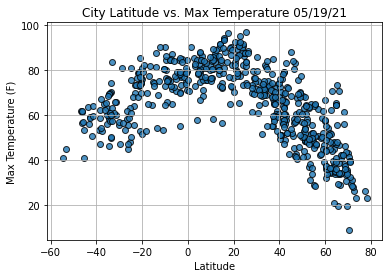

In [13]:
#import the time module
import time

#Build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properites 
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig1.png")

#show the figure
plt.show()

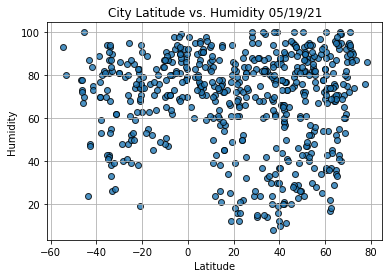

In [14]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats, humidity,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properites 
plt.title(f'City Latitude vs. Humidity '+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig2.png")

#show the figure
plt.show()

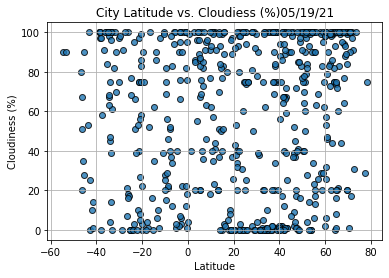

In [15]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats, cloudiness,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properites 
plt.title(f'City Latitude vs. Cloudiess (%)'+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig3.png")

#show the figure
plt.show()

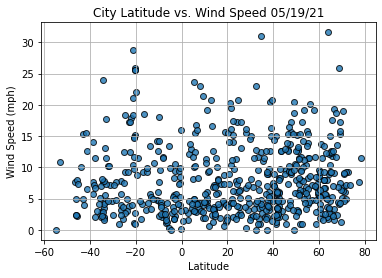

In [16]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats, wind_speed,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properites 
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig4.png")

#show the figure
plt.show()

In [48]:
#import linregress
from scipy.stats import linregress

#create a function to create preform linear regression on the weather data
#and plot a fregression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression of hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    #calculate the regression ine "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept, 2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [49]:
#create northern and southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

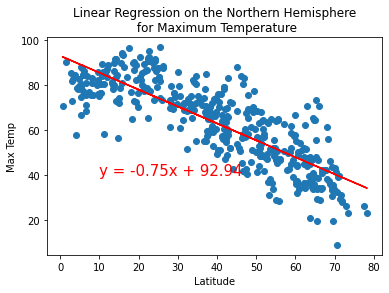

In [50]:
#linear regression on Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Max Temp"]
#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', "Max Temp", (10,40))

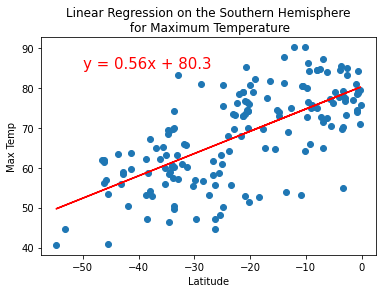

In [51]:
#linear regression on Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', "Max Temp", (-50,85))

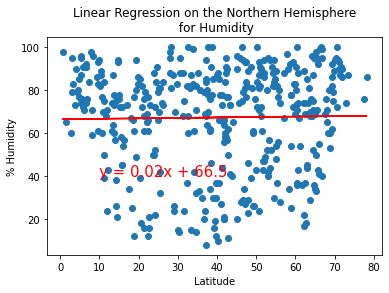

In [52]:
#linear regression on Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\n for Humidity', "% Humidity", (10,40))

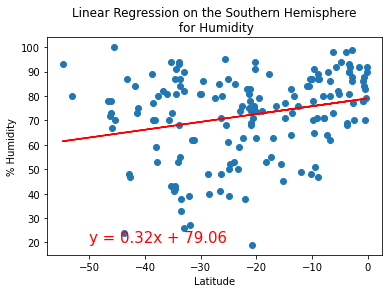

In [53]:
#linear regression on Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\n for Humidity', "% Humidity", (-50,20))

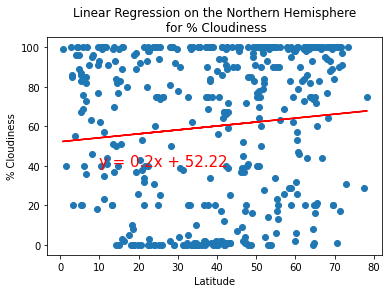

In [54]:
#linear regression on Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\n for % Cloudiness', "% Cloudiness", (10,40))

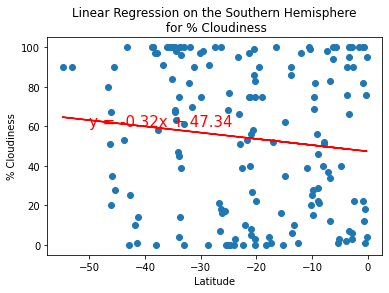

In [55]:
#linear regression on Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\n for % Cloudiness', "% Cloudiness", (-50,60))

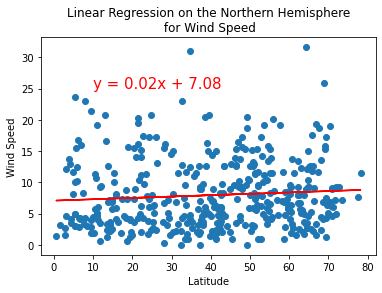

In [56]:
#linear regression on Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\n for Wind Speed', "Wind Speed", (10,25))

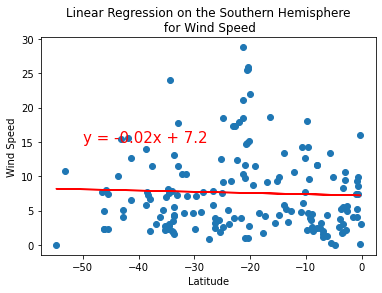

In [57]:
#linear regression on Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\n for Wind Speed', "Wind Speed", (-50,15))